| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over 50K
| a year.
|
| Conversion of original data as follows:
| 1. Discretized a grossincome into two ranges with threshold 50,000.
| 2. Convert U.S. to US to avoid periods.
| 3. Convert Unknown to "?"
| 4. Run MLC++ GenCVFiles to generate data,test.

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
#import librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#names of columns
names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race',
        'sex','capital-gain','capital-loss','hours-per-week','native-country','gross-income']

In [4]:
df = pd.read_csv('data/adult-all.csv',names=names) #load csv file into a pandas dataFrame

In [5]:
df.head() #returns the first 5 rows of the dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gross-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.tail() #returns the last 5 rows of the dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gross-income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [7]:
df.shape # returns the number of rows and columns in the dataset

(48842, 15)

In [8]:
df.info() #returns column names, non-null counts and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  gross-income    48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
df.describe(include='all').T #a descriptive statistics of the columns in the dataset

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns = df.columns.str.replace('-','_') #replaces '-' with '_' in column names

In [11]:
#split the columns into numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include='object').columns

In [12]:
#Numerical Columns
print('Numerical Columns : \n',numerical_columns)

Numerical Columns : 
 Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [13]:
for col in numerical_columns:
    print(f'{col} - Min : {df[col].min()} - Max : {df[col].max()}')

age - Min : 17 - Max : 90
fnlwgt - Min : 12285 - Max : 1490400
education_num - Min : 1 - Max : 16
capital_gain - Min : 0 - Max : 99999
capital_loss - Min : 0 - Max : 4356
hours_per_week - Min : 1 - Max : 99


In [14]:
#Categorical Columns
print('Categorical columns : \n',categorical_columns)

Categorical columns : 
 Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'gross_income'],
      dtype='object')


In [15]:
for col in categorical_columns:
    print(f'{col}\n - {df[col].unique()} - {df[col].nunique()}\n')

workclass
 - ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] - 9

education
 - ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] - 16

marital_status
 - ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] - 7

occupation
 - ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] - 15

relationship
 - ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] - 6

race
 - ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] - 5

sex
 - ['Male' 'Female'] - 2

native_country
 - ['United-States' 'Cuba' 'Jamaica' 'India' '?' '

In [16]:
df.replace('?',np.nan,inplace=True) #replace all ? with np.nan (i.e. treat them as missing values)

In [17]:
#check for missing values 
missing = df.isnull().sum()
missing = missing[missing>0].sort_values(ascending=False)
missing_pct = missing / len(df) * 100 # the percentage of missing values in the dataset
missing_values = pd.DataFrame({
    'missing' : missing,
    'missing pct' :round(missing_pct,2)
})
missing_values

,missing,missing pct
occupation,2809,5.75
workclass,2799,5.73
native_country,857,1.75


In [18]:
df[df.duplicated()] #check for data duplication

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [19]:
df.drop_duplicates(inplace=True) #removes duplicated data

<Axes: >

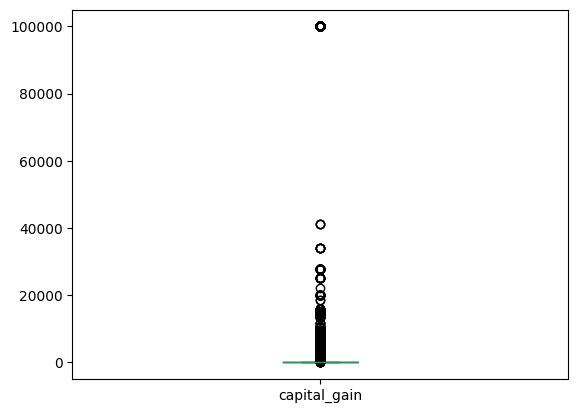

In [20]:
#univariate analysis of the capital column - suspected of having outliers
#among numerical columns, the capital gain column appears to contain some outliers
df['capital_gain'].plot(kind='box')

In [21]:
#bivariate analysis of capital gain and gross income
#Goal - to analyze relationship between capital gain of 99999 with gross income
#Insight : Individuals with capital gain of 99999 all earn above 50K, therefore we keep those rows
df[df['capital_gain'] == 99999]['gross_income'].value_counts(normalize=True)

gross_income
>50K    1.0
Name: proportion, dtype: float64

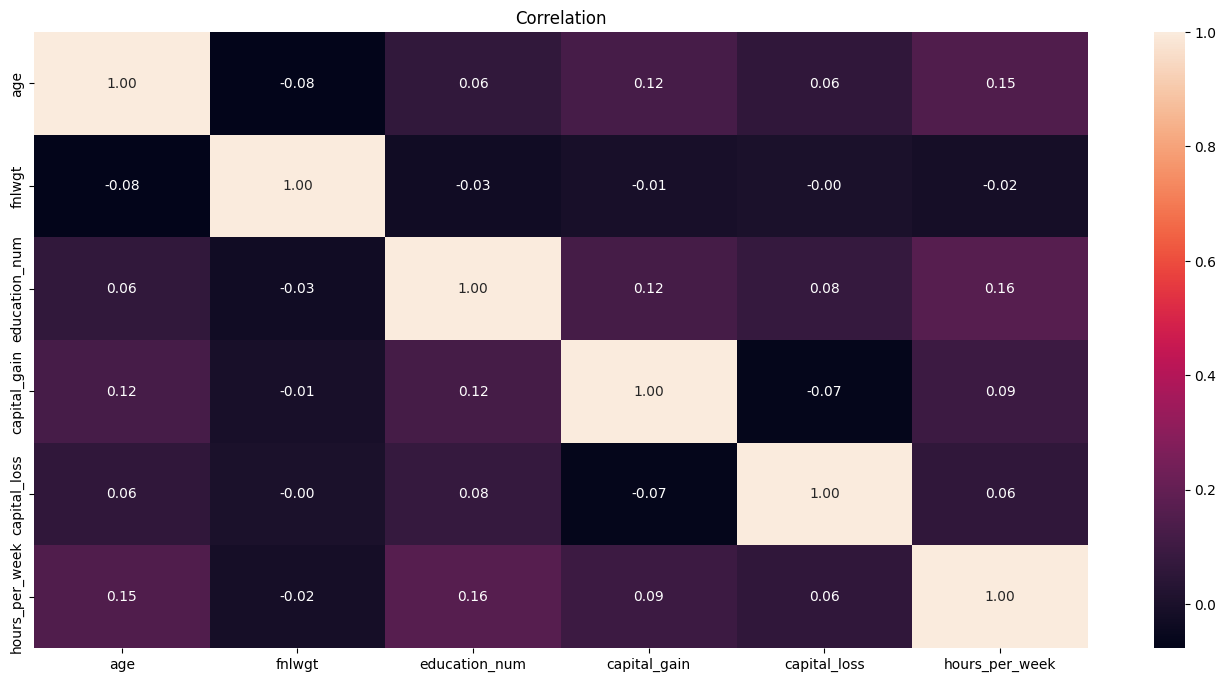

In [22]:
corr = df.corr(method='spearman',numeric_only=True)
plt.figure(figsize=(17,8))
sns.heatmap(data=corr,fmt='.2f',annot=True)
plt.title('Correlation')
plt.show()
#Insight - There is little to no correlation between numeric columns

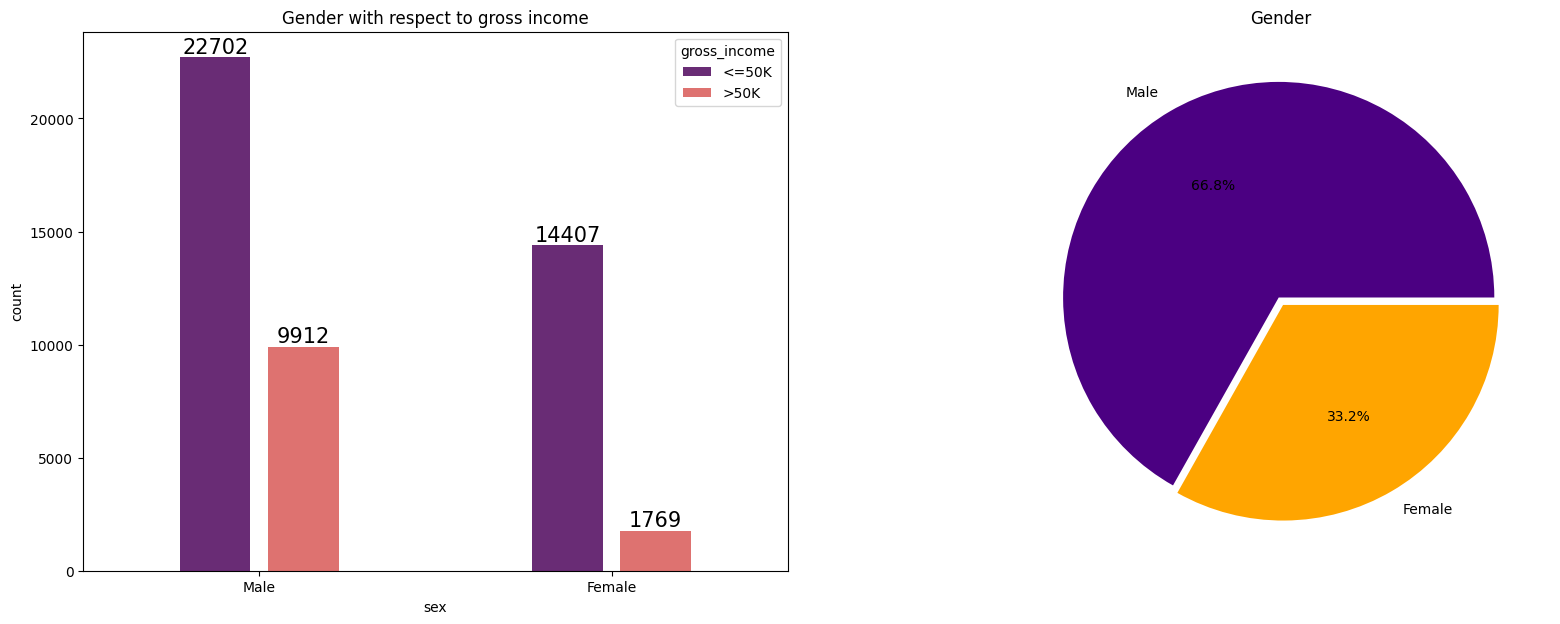

In [23]:
#Sex column
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
ax = sns.countplot(data=df,x='sex',hue='gross_income',palette='magma',width=0.5,gap=0.2)
for container in ax.containers:
    ax.bar_label(container,label_type='edge',fontsize=15)
plt.title('Gender with respect to gross income')

plt.subplot(1,2,2)
plt.pie(x=df['sex'].value_counts(),labels=df['sex'].unique(),
        autopct='%1.1f%%',explode=[0.02,0.02],colors=['indigo','orange'])
plt.title('Gender')
plt.show()

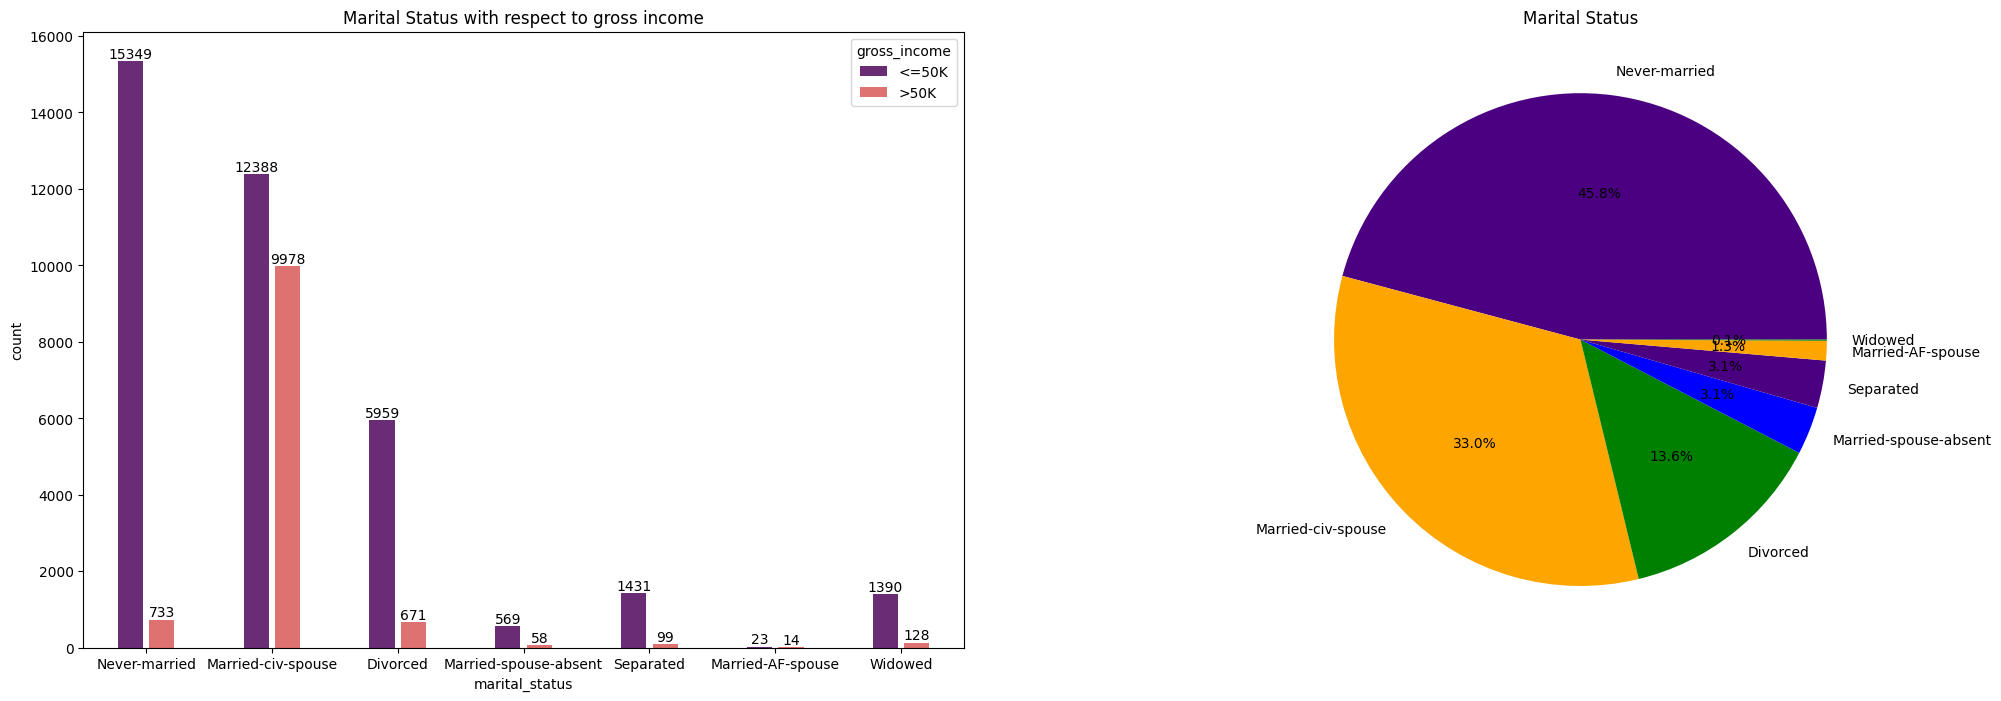

In [24]:
#Marital status column
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
ax = sns.countplot(data=df,x='marital_status',hue='gross_income',palette='magma',width=0.5,gap=0.2)
for container in ax.containers:
    ax.bar_label(container,label_type='edge',fontsize=10)
plt.title('Marital Status with respect to gross income')

plt.subplot(1,2,2)
plt.pie(x=df['marital_status'].value_counts(),labels=df['marital_status'].unique(),
        autopct='%1.1f%%',colors=['indigo','orange','green','blue'])
plt.title('Marital Status')
plt.show()

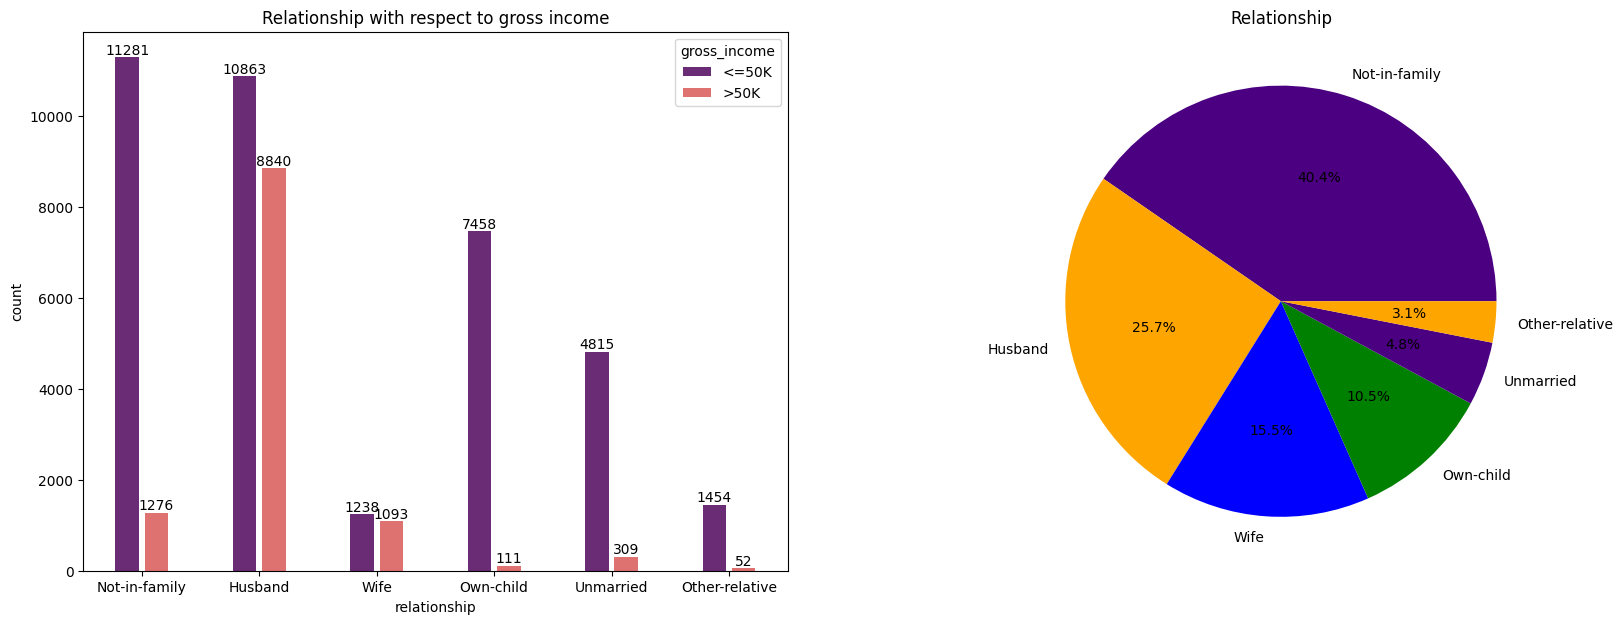

In [25]:
#Relationship column
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
ax = sns.countplot(data=df,x='relationship',hue='gross_income',palette='magma',width=0.5,gap=0.2)
for container in ax.containers:
    ax.bar_label(container,label_type='edge',fontsize=10)
plt.title('Relationship with respect to gross income')

plt.subplot(1,2,2)
plt.pie(x=df['relationship'].value_counts(),labels=df['relationship'].unique(),
        autopct='%1.1f%%',colors=['indigo','orange','blue','green'])
plt.title('Relationship')
plt.show()


In [ ]:
# Save processed file
df.to_csv('-data/cleaned_adult-all.csv', index=False)